# Washington District of Columbia Crime Data Analysis

Jacob Ramsburg and Tanner Owen

# Introduction

For this tutorial through data science, we decided to analyze crime in the Washington District of Columbia (D.C.). Area for the year 2019. Not too long ago in 1991, Washington D.C. was considered the “murder capital” of the United States along with other record-high crime incidents. However, since then crime has decreased significantly so the purpose of this analysis is to discover the most prevalent crimes and find a correlation between the type of crime and when it occurred. We will also find the best way to map the crime and discover if there are hotspots of crime in D.C. 

For this project, we will use the data science life cycle. The steps to this process are Data collection, data processing, exploratory analysis & Data visualization, analysis/hypothesis testing, and Machine Learning, Insight & Policy Decision. In this project, we will do the first 4 steps of the data science lifecycle.  

## A deep explanation of our project of data lifecycle


#### Reasources Required for this Project
1. numpy - On its website numpy it is described as, “the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object.” It is widely used for being very fast because it uses pre compiled C code.  Learn more at: https://numpy.org/doc/stable/index.html


2. pandas - Is an open-source Python library built on top of numpy. We will use the main two data structures which are Series and DataFrame. A Series is a data structure with only one and a DataFrame is a data structure that can have as many columns. Learn more at: https://pandas.pydata.org/docs/user_guide/index.html 


3. matplotlib - Is a great data visualization tool. Learn the basics at: https://www.geeksforgeeks.org/python-matplotlib-an-overview/ 


4. seaborn - Seaborn is a great library built on top of matplotlib. Seaborn makes it very simple to plot. Learn the types of plots at: https://seaborn.pydata.org/tutorial.html 


5. datetime - The main purpose of datetime is to turn strings that are dates into objects that contain variables for the minute, hour, date, etc. It is also really important for graphing dates. Learn more at: https://docs.python.org/3/library/datetime.html 


6. Violin Plot - Violin plots are great at showing data density over a variable. They show modes, median and quartiles. Learn the basics of violin plots at: https://mode.com/blog/violin-plot-examples/ 


7. Follium - Folium is used for creating maps and putting data. Learn more at: http://python-visualization.github.io/folium/ 


8. SKLEARN - This is a simple but powerful machine learning library. In this project, we will use it for regression and clustering. Learn more at: https://scikit-learn.org/stable/ 


This is all of the imported libraries we will us in the project

In [1]:
import folium
import requests
import pandas
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import datetime
from datetime import date
import calendar
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Data Collection 

We acquired our data from https://opendata.dc.gov/ which is the D.C. government site where they release datasets on various topics. We chose to analyze the crime incidents in 2019, since this was the last year before the COVID-19 Pandemic hit the United States. We were able to collect the data into a readable format as a .csv file, and were then able to analyze it using the pandas’ library read_csv method. This method puts all of the data from the file into a DataFrame and automatically sets up the proper rows and columns. This is the ideal place to collect data because it is a government website, so we know the data is legitimate and it was downloadable as a CSV file and eliminate the need to scrape a website. 

In [2]:
# Creating the dataframe that we'll use throughout this project
crime_data = pandas.read_csv("Crime_Incidents_in_2019.csv")
crime_data.head(5)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,002502 1,2502.0,Precinct 47,38.939209,-77.029705,NaN,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,002801 1,2801.0,Precinct 41,38.932567,-77.034601,NaN,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,001100 2,1100.0,Precinct 32,38.959912,-77.085288,NaN,2019/05/12 16:12:47+00,NaN,83121289,NaN
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,005800 1,5800.0,Precinct 129,38.897348,-77.026509,DOWNTOWN,2019/05/12 17:07:36+00,NaN,83121290,NaN
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,002002 2,2002.0,Precinct 54,38.957815,-77.028231,NaN,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN


# Data Processing

We began our data processing by converting the data from the DataFrame into columns that we would focus on in our analysis. For example, we created a single column, called CORDS, for both latitude and longitude (X, Y in the original dataset). We also drop columns we will not utilize in this project to make the DataFrame clean and display only the information we require for our analysis. 

In [3]:
# Create a numpy array of lists with indexes 0=LATITUDE, 1=LONGITUDE
cords = np.array(crime_data[['LATITUDE','LONGITUDE']]) 
crime_data['CORDS'] = cords.tolist()
crime_data['time'] = pandas.to_datetime(crime_data['START_DATE'],format= '%H:%M',exact=False).dt.hour
crime_data = crime_data.drop(columns=['VOTING_PRECINCT','BID','OBJECTID','OCTO_RECORD_ID',
                                      'CCN','X','Y','REPORT_DAT','SHIFT','BLOCK','XBLOCK',
                                      'YBLOCK','WARD','ANC','DISTRICT','PSA',
                                      'NEIGHBORHOOD_CLUSTER','BLOCK_GROUP','CENSUS_TRACT'])
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17
...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18


Next, we added columns to separate the date and time of the event. This includes adding the hour that the crime occurred on, the day, month, day of the year, and weekday. We utilized the pandas datetime library to do this. By using Timestamp on the START_DATE column we were able to determine the actual weekday (Sunday, Monday, Tuesday, …) that the crime occurred on.

In [4]:
# Creation of day and month columns
crime_data['day'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.day
crime_data['month'] = pandas.to_datetime(crime_data['START_DATE'],exact=False).dt.month

days_before_each_month = [0,31,59,90,120,151,181,212,243,273,304,334]

# This method finds the day (1-365) the crime occurred on
def find_day_of_year(row):
    month = row['month']
    day = row['day']
    return days_before_each_month[month-1] + day

crime_data['day_of_year'] = crime_data.apply(lambda row: find_day_of_year(row), axis=1)

# Create a column of the weekday (Sunday, Monday, Tuesday, ...)
crime_data['weekday'] = crime_data.apply(lambda row: pandas.Timestamp(row['START_DATE']).day_name(), axis=1)
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time,day,month,day_of_year,weekday
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3,12,5,132,Sunday
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15,12,5,132,Sunday
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16,12,5,132,Sunday
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17,12,5,132,Sunday
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17,12,5,132,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18,20,7,201,Saturday
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5,22,7,203,Monday
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16,23,7,204,Tuesday
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18,23,7,204,Tuesday


We then added a column for which season the crime occurred in: Winter, Spring, Summer, Fall.

In [5]:
# Determines the season (szn) of the crime (these dates are from 2019)
def find_szn(row):
    #First 4 if statements to decide on months where season changes
    if (row['month'] == 3):
        if (row['day'] < 20):
            return "Winter"
        else:
            return "Spring"
    elif (row['month'] == 6):
        if (row['day'] < 21):
            return "Spring"
        else:
            return "Summer"
    elif (row['month'] == 9):
        if (row['day'] < 23):
            return "Summer"
        else:
            return "Fall"
    elif (row['month'] == 12):
        if (row['day'] < 22):
            return "Fall"
        else:
            return "Winter"
    elif (row['month'] < 3):
        return "Winter"
    elif (row['month'] < 6):
        return "Spring"
    elif (row['month'] < 9):
        return "Summer"
    elif (row['month'] < 12):
        return "Fall"
    else:
        return "Fake Month!"
# Creation of the season column    
crime_data['season'] = crime_data.apply(lambda row: find_szn(row), axis=1)
crime_data

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time,day,month,day_of_year,weekday,season
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3,12,5,132,Sunday,Spring
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15,12,5,132,Sunday,Spring
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16,12,5,132,Sunday,Spring
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17,12,5,132,Sunday,Spring
4,OTHERS,BURGLARY,38.957815,-77.028231,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,"[38.9578148866, -77.0282306394]",17,12,5,132,Sunday,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,OTHERS,THEFT F/AUTO,38.940274,-77.032729,2019/07/20 18:00:29+00,2019/07/23 18:47:29+00,"[38.9402738789, -77.0327286883]",18,20,7,201,Saturday,Summer
33912,OTHERS,THEFT/OTHER,38.880276,-76.994977,2019/07/22 05:54:56+00,2019/07/22 05:55:18+00,"[38.880275773, -76.9949765956]",5,22,7,203,Monday,Summer
33913,OTHERS,THEFT F/AUTO,38.925815,-77.100822,2019/07/23 16:30:33+00,2019/07/23 17:25:54+00,"[38.9258152896, -77.1008215022]",16,23,7,204,Tuesday,Summer
33914,OTHERS,THEFT/OTHER,38.948792,-77.078746,2019/07/23 18:05:57+00,2019/07/23 19:10:12+00,"[38.9487916125, -77.0787458915]",18,23,7,204,Tuesday,Summer


# Exploratory Analysis

First we began by creating a pie chart to illustrate how much a particular crime was committed in 2019 in relation to the other crimes. As clearly shown by this pie chart, THEFT/OTHER & THEFT F/AUTO are the two dominant crimes committed in Washington D.C. The other crimes require further analysis to discover the rankings of which one appears more.

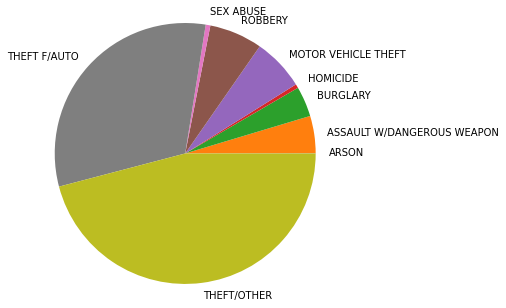

In [6]:
crimes, count = np.unique(crime_data['OFFENSE'],return_counts=True)
plt.pie(count,labels = crimes,radius = 1.5);

We utilized the pandas DataFrame library to create small tables displaying the exact number of instances all the crimes occurred within our dataframe.

In [7]:
# This table will display the number of times the nine crimes in our dataframe occured
crime_type_table = crime_data['OFFENSE'].value_counts()
crime_type_table

THEFT/OTHER                   15571
THEFT F/AUTO                  10719
ROBBERY                        2232
MOTOR VEHICLE THEFT            2186
ASSAULT W/DANGEROUS WEAPON     1567
BURGLARY                       1272
SEX ABUSE                       197
HOMICIDE                        164
ARSON                             8
Name: OFFENSE, dtype: int64

From there we decided to isolate the 5 most prevalent crimes in D.C. We also create a new DataFrame that only has the top 5 crime in it

In [29]:
top_crime_table = crime_type_table[:5]
top_crime_data = crime_data[crime_data['OFFENSE'].isin(top_crime_table.index)] 
top_crime_data.head()

,METHOD,OFFENSE,LATITUDE,LONGITUDE,START_DATE,END_DATE,CORDS,time,day,month,day_of_year,weekday,season
0,OTHERS,THEFT F/AUTO,38.939209,-77.029705,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,"[38.9392090053, -77.0297051135]",3,12,5,132,Sunday,Spring
1,OTHERS,THEFT/OTHER,38.932567,-77.034601,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,"[38.9325673709, -77.0346008373]",15,12,5,132,Sunday,Spring
2,OTHERS,THEFT/OTHER,38.959912,-77.085288,2019/05/12 16:12:47+00,NaN,"[38.9599119666, -77.085288276]",16,12,5,132,Sunday,Spring
3,OTHERS,THEFT/OTHER,38.897348,-77.026509,2019/05/12 17:07:36+00,NaN,"[38.8973478904, -77.0265085554]",17,12,5,132,Sunday,Spring
5,OTHERS,THEFT/OTHER,38.898614,-76.974824,2019/05/12 17:36:33+00,NaN,"[38.8986142204, -76.974824299]",17,12,5,132,Sunday,Spring


# Data Visualization

From the results of our data processing, we were able to create bar graphs depicting how many incidents of a particular crime occurred during an hour of the day, 0=12 A.M. and 23= 11 P.M. As expected, these graphs depicted high incidences of crime between the afternoon to nighttime hours of 12 P.M. - 3 A.M.

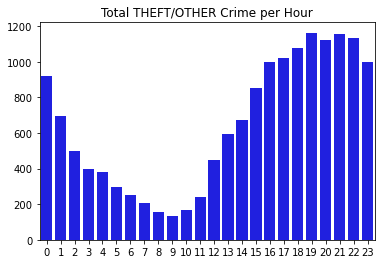

In [31]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT/OTHER'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT/OTHER Crime per Hour");

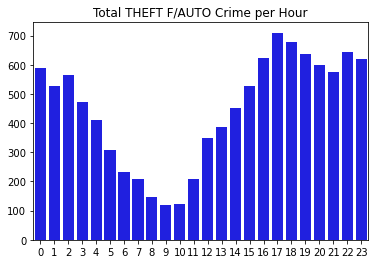

In [32]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'THEFT F/AUTO'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total THEFT F/AUTO Crime per Hour");

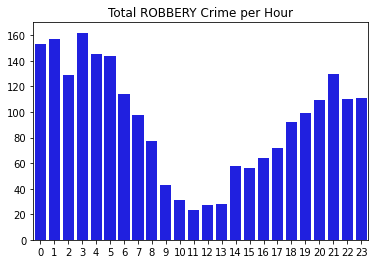

In [33]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ROBBERY'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ROBBERY Crime per Hour");

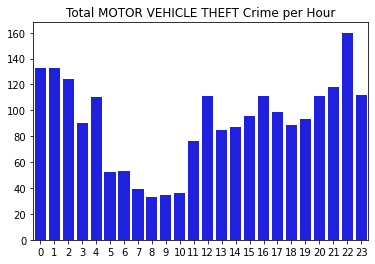

In [34]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'MOTOR VEHICLE THEFT'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total MOTOR VEHICLE THEFT Crime per Hour");

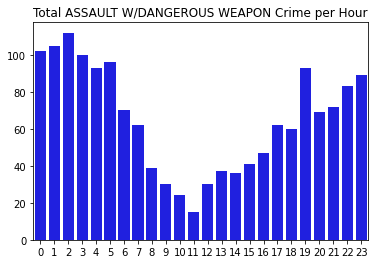

In [35]:
hour, crime_count = np.unique(crime_data[crime_data['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON'].time,return_counts=True)
sns.barplot(hour,crime_count,color = 'blue').set(title="Total ASSAULT W/DANGEROUS WEAPON Crime per Hour");

We then utilized the seaborn library to be able to visualize the top 5 most popular crimes on one graph. We will first make one bar graph and then we will make a voilin plot. The bar graph is not as good at visualizing because theft is way more common so it hard to see the trend of the other crimes over time.

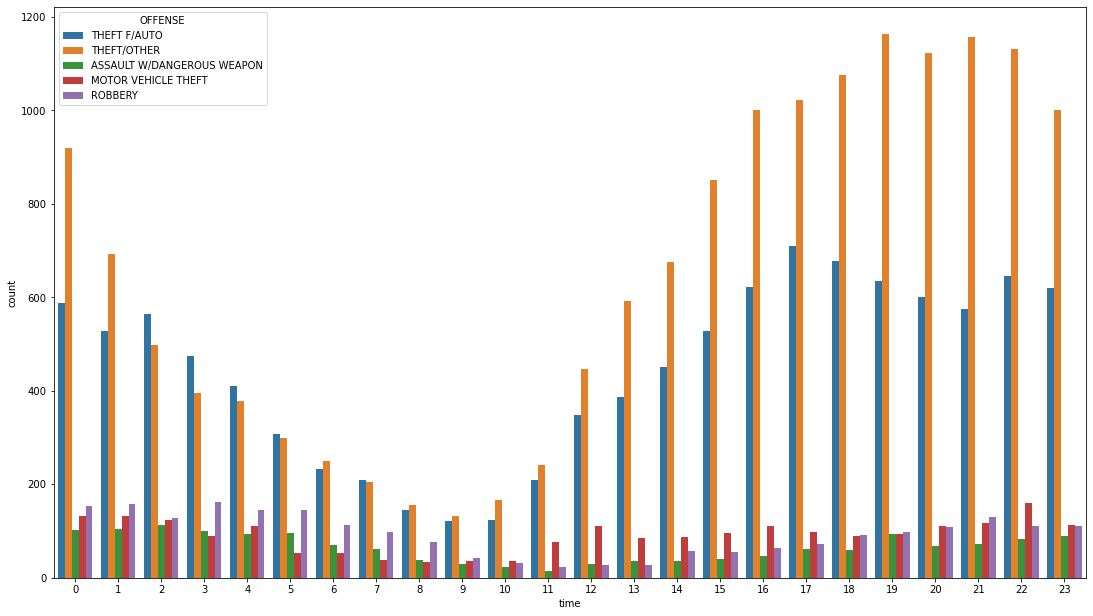

In [36]:
fig = plt.figure(figsize=(10,80))
fig.set_size_inches(18.5, 10.5)
sns.countplot(x="time", hue="OFFENSE", data=top_crime_data);

Now we will make a violin plot (which is a hybrid of a box plot and a kernel density plot) to show the distribution of our data over time which is better at visualizing the data. We chose to make the voilin plot scale = 'count' because you see the differenece of amount of crime per hour. Normally voilin plots scale is set to 'area' which makes them all of the voilins the same area. We want to be able to see the amount of the different crimes

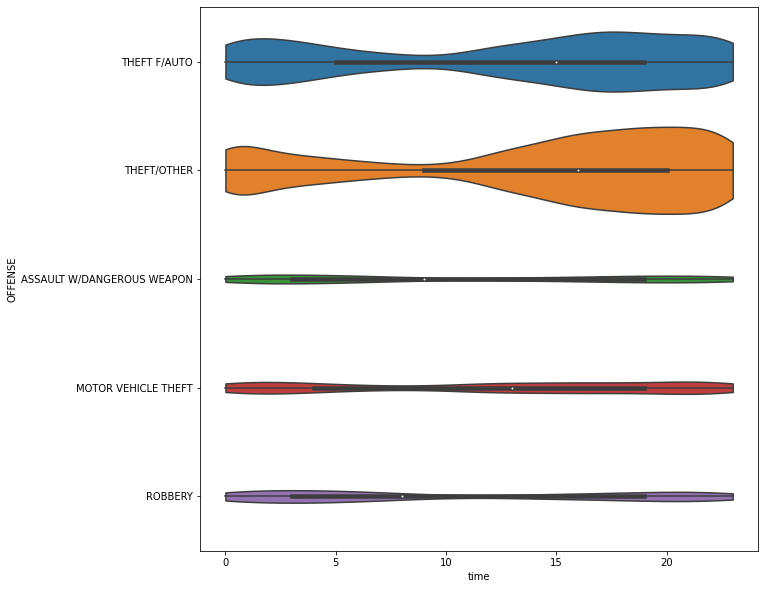

In [37]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(data=top_crime_data, x = 'time',y='OFFENSE',cut=0,scale='count');

# Analysis, Hypothesis Testing, & Machine Learning

Our hypothesis is that there is a correlation between the amount of robberies on a given day due to the season and the day of the week (Sunday, Monday, Tuesday, ... ). We will first look at some graphs and then use linear regression to see if this is true. 

The first graph that we will make is the number of instances of robbery occurred per day of the year.

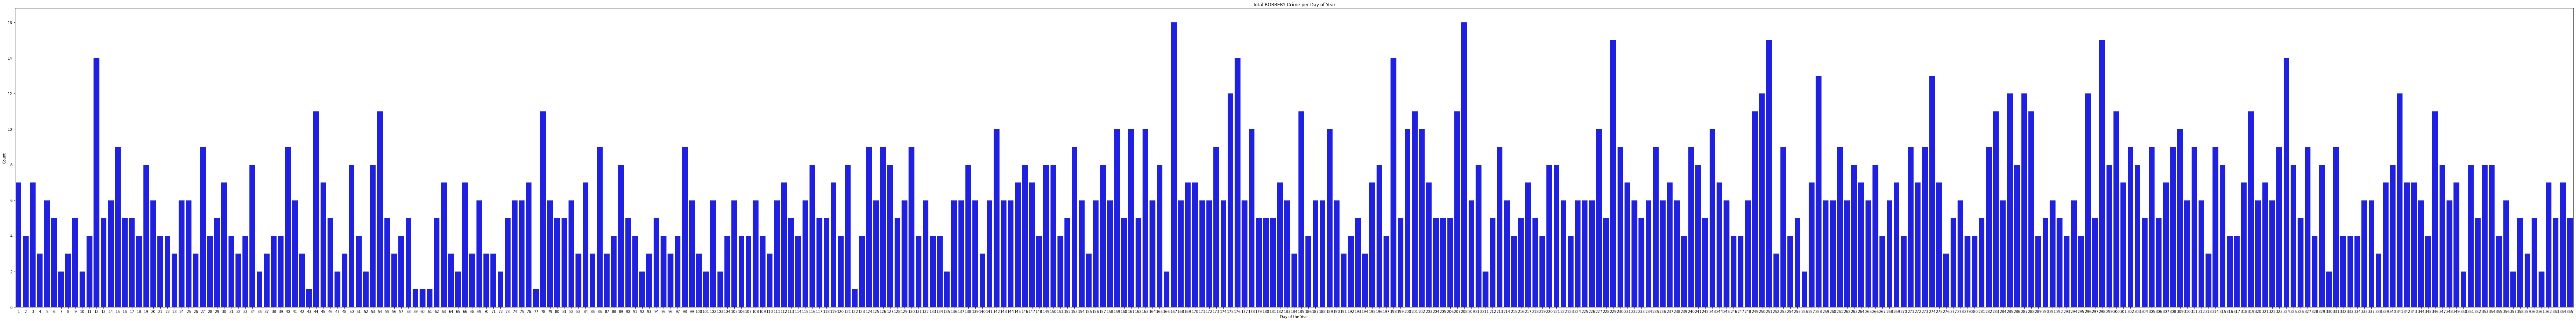

In [16]:
# MAKE THE FONTSIZE LARGER FOR X,Y,TITLE
crime_type = 'ROBBERY'
fig = plt.figure(figsize=(125,15))
day, count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].day_of_year,return_counts=True)
sns.barplot(day,count,color= 'blue').set(title="Total ROBBERY Crime per Day of Year",
                                         xlabel= "Day of the Year", ylabel= "Count");

Since the above bar plot is very difficult to read, we split the data of ROBBERY crimes into months.

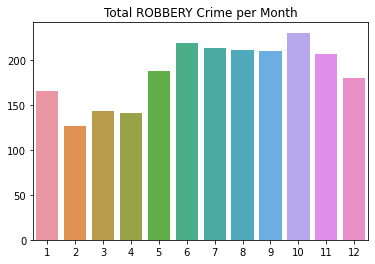

In [17]:
month, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].month,return_counts=True)
sns.barplot(month,crime_count).set(title="Total ROBBERY Crime per Month");

We then split the data according to season.

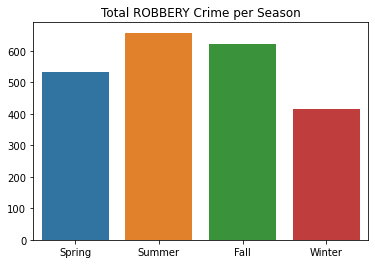

In [40]:
szn, crime_count = np.unique(crime_data[(crime_data['OFFENSE'] == crime_type)].season,return_counts=True)
order = ['Spring', 'Summer','Fall','Winter']
sns.barplot(szn,crime_count,order=order).set(title="Total ROBBERY Crime per Season");

Next, we split the ROBBERY data by its corresponding day of the week.

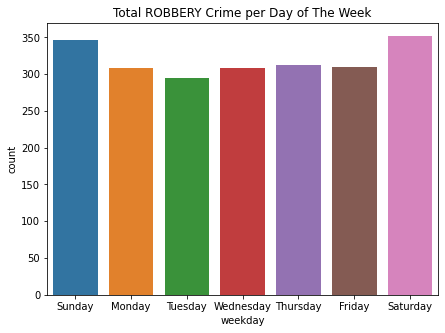

In [41]:
fig = plt.figure(figsize=(7,5))
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.countplot(x="weekday", data=crime_data[crime_data['OFFENSE'] == crime_type],order=order).set(title="Total ROBBERY Crime per Day of The Week");

# Machine learning

We will use machine learning in two different ways in this project. First, we will utilize linear regression to discover if there is a correlation between the amount of crime during a day with the season and the day's name (Sunday, Monday, Tuesday, ...) Then the second way we will use KMEANS to find clusters of crime and map them. 

### Machine Learning - Linear Regression 
See if there is a Correlation between amount of robbery in a day because of the week_day and season 

In [20]:
robbery_data = crime_data[crime_data['OFFENSE'] == 'ROBBERY']
day, count = np.unique(robbery_data['day_of_year'],return_counts=True)
subset = robbery_data.drop_duplicates(subset='day_of_year').sort_values(by='day_of_year')
robbery_per_day_data = subset[['day_of_year','weekday','season']]
robbery_per_day_data['amount_of_crime'] = count
robbery_per_day_data.head()

,day_of_year,weekday,season,amount_of_crime
10652,1,Wednesday,Winter,7
13896,2,Wednesday,Winter,4
18337,3,Thursday,Winter,7
31564,4,Friday,Winter,3
13910,5,Saturday,Winter,6


Since the columns 'weekday' and 'season' of the robbery_per_day_data DataFrame are categorical variables we need to change them to numerical for regression. Learn more catagorical and numerical data types. Learn more at:  https://cmsc320.github.io/lecs/cmsc320_f2021_lec02.pdf starting at slide 41
<br> We have to use .get_dummies to change the catagorical variables to numeric so we can use regression
<br>X is the training data

In [21]:
X = pandas.get_dummies(data=robbery_per_day_data).drop(columns=['amount_of_crime','day_of_year'])
X.head()

,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_Fall,season_Spring,season_Summer,season_Winter
10652,0,0,0,0,0,0,1,0,0,0,1
13896,0,0,0,0,0,0,1,0,0,0,1
18337,0,0,0,0,1,0,0,0,0,0,1
31564,1,0,0,0,0,0,0,0,0,0,1
13910,0,0,1,0,0,0,0,0,0,0,1


Y is the target which is the amount of crime in the day

In [22]:
Y = robbery_per_day_data['amount_of_crime']
Y.head()

10652    7
13896    4
18337    7
31564    3
13910    6
Name: amount_of_crime, dtype: int64

We first split the data up into a training set and a testing set. We do this so we do not overfit the data. We train the linear regression on the training set and score it on the test set. The score returns the R^2 score of the data which is the ( ((y_true - y_pred)** 2).sum() ) / ( ((y_true - y_true.mean()) ** 2).sum() ). R^2 score is a value between 0 and 1. The bigger the score means the better the model is
<br> Learn more about R^2 at https://en.wikipedia.org/wiki/Coefficient_of_determination

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.07257088504524956

A R^2 score of .0726 is really bad. We will graph our predictions of the crime on a given day versus the actual to illustrate how poor the score is

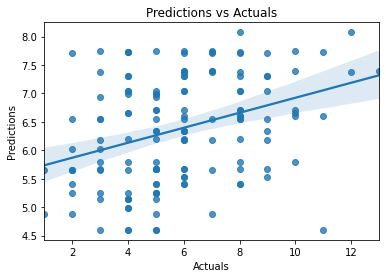

In [24]:
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
plt.title('Predictions vs Actuals')
plt.xlabel('Actuals')
plt.ylabel('Predictions');

##### Why the linear regression was bad
The reason the predictions were so bad is because there weren't enough predictors. We only used the season and the day's name (Sunday, Monday, Tuesday, ...). If we had more predictors it would have been better. One predictor that would have probably helped was the average temperature of the day. Another could have been the weather during the time of the crime.

### Machine Learning- KMEANS
We will use KMEANS to map crime clusters. There is way too much crime in our data set to put it on a map because it will appear meaningless because there would be points covering the entire map.

###### To get an idea of what the crime spread looks like
We will plot the crime on a plot not a map, and as you can see it almost entirely outlines the entire Washington D.C. territory.

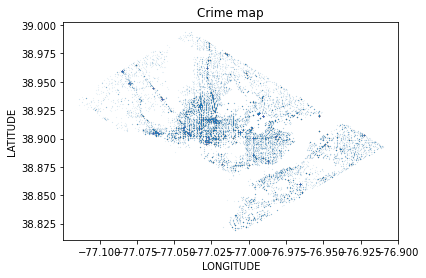

In [25]:
cords = crime_data['CORDS']
lat = [cord[0] for cord in cords]
long = [cord[1] for cord in cords]

# We made the size of each point small so you can see the sheer number of crimes commited
plt.scatter(long,lat,s=.001)
plt.title("Crime map")
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

##### Better Approach using KMEANS
KMEANS is a machine learning technique that clusters the data. You call KMEANS(x) and it clusters the data with x clusters. There is no best way to choose the number of clusters, increasing the number of clusters after a certain amount yields little improvement in the Squared error. The squared error is the average distance to the closes center. Therefore, you should choose the number of clusters because one more cluster yields little improvement in error. Learn more about KMEANS at: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

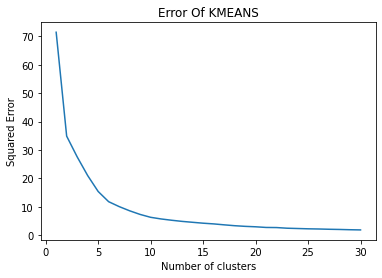

In [26]:
x_limit = 30  # The x scale for the graph and the number of times KMEANS is run

inertia = [] # Kmeans error
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
for i in range(1,x_limit+1):
    kmeans = KMeans(i) # ith KMEANS 
    kmeans.fit(cords)      # fit it to the data
    inertia.append(kmeans.inertia_)  # appened the error to the inertia array

number_clusters = [i for i in range(1,x_limit+1)]
plt.plot(number_clusters,inertia)  # Ploting the Error Of KMEANS
plt.title('Error Of KMEANS')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Error');

We choose to use 20 cluster because after 20 there is little improvement in the squared error. You can change the amount of clusters and see how that changes the clusters. 

In [42]:
number_of_clusters = 20
kmeans = KMeans(number_of_clusters) # ith KMEANS 
kmeans.fit(cords)

Next we get the total number of crime associated with each center. We do this so we can see the difference of amount of crime at each center. More crime at a given center yeilds a bigger radius of the circle

In [ ]:
total_crime = crime_data.shape[0] # Gets number of rows
crime_density = [] # getting the number of crimes per cluster
for i in range(number_of_clusters):
    crime_density.append(list(kmeans.labels_).count(i)/total_crime)

Below is the code to map the crime and scale each center with it's crime_density 

In [28]:
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
for i in range(number_of_clusters):
    folium.Circle(
        radius =crime_density[i]*10000,
        location=[kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]],
        color="red",
    fill=True,
    ).add_to(map_osm)# add circle to the map   
map_osm